<a href="https://colab.research.google.com/github/AdiRagil/machine/blob/main/UTS1_G.231.21.0023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd # ntuk mengimpor pustaka Pandas di lingkungan pemrograman Python
import numpy as np # untuk mengimpor pustaka NumPy di lingkungan pemrograman Python
data=pd.read_csv('CADdataset.csv', on_bad_lines='skip') # untuk membaca data dari file CSV ke dalam struktur data Pandas yang disebut DataFrame di Python

In [21]:
data.head() # digunakan untuk menampilkan beberapa baris pertama dari DataFrame

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal


In [22]:
data=pd.get_dummies(data) # untuk melakukan proses yang disebut "one-hot encoding" pada DataFrame menggunakan fungsi get_dummies dari pustaka Pandas

In [23]:
data.head() # digunakan untuk menampilkan beberapa baris pertama dari DataFrame

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,...,Atypical_N,Atypical_Y,Nonanginal_N,Nonanginal_Y,LVH_N,LVH_Y,PRP_N,PRP_Y,CAD_Cad,CAD_Normal
0,53,90,175,29.387755,0,1,1,110,0,1,...,1,0,1,0,1,0,1,0,1,0
1,67,70,157,28.398718,0,1,0,140,1,1,...,1,0,1,0,1,0,1,0,1,0
2,54,54,164,20.077335,0,0,1,100,1,0,...,1,0,1,0,1,0,1,0,1,0
3,66,67,158,26.838648,0,1,0,100,0,1,...,1,0,0,1,1,0,1,0,0,1
4,50,87,153,37.165193,0,1,0,110,0,0,...,1,0,1,0,1,0,1,0,0,1


In [24]:
data=data.dropna() # untuk menghapus baris yang mengandung nilai-nilai NaN (Not a Number) dari DataFrame di Python

In [25]:
y=data['CAD_Normal'] # untuk membuat variabel y yang akan menyimpan kolom 'CAD_Normal' dari DataFrame data

In [26]:
print(data.shape) # digunakan untuk menampilkan bentuk (shape) dari DataFrame data
print(y.shape) # digunakan untuk menampilkan bentuk (shape) dari Series y

(303, 36)
(303,)


In [27]:
data.drop(['CAD_Normal'], axis=1) # digunakan untuk menghapus kolom 'CAD_Normal' dari DataFrame data

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,...,WPE_Y,Atypical_N,Atypical_Y,Nonanginal_N,Nonanginal_Y,LVH_N,LVH_Y,PRP_N,PRP_Y,CAD_Cad
0,53,90,175,29.387755,0,1,1,110,0,1,...,0,1,0,1,0,1,0,1,0,1
1,67,70,157,28.398718,0,1,0,140,1,1,...,0,1,0,1,0,1,0,1,0,1
2,54,54,164,20.077335,0,0,1,100,1,0,...,0,1,0,1,0,1,0,1,0,1
3,66,67,158,26.838648,0,1,0,100,0,1,...,0,1,0,0,1,1,0,1,0,0
4,50,87,153,37.165193,0,1,0,110,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,29.761905,0,0,0,100,1,0,...,0,1,0,1,0,1,0,1,0,1
299,55,64,152,27.700831,0,0,0,100,0,0,...,0,0,1,1,0,1,0,1,0,0
300,48,77,160,30.078125,0,1,0,130,0,0,...,0,1,0,0,1,1,0,1,0,0
301,57,90,159,35.599858,1,0,0,100,0,0,...,0,0,1,1,0,1,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split # untuk membagi dataset menjadi dua subset: satu untuk melatih model (train set) dan yang lainnya untuk menguji model (test set)
x_train, x_test, y_train, y_test = train_test_split(data,y,shuffle=True) # untuk membagi dataset menjadi empat subset

In [29]:
# mendefinisikan sebuah fungsi accuracy yang mengukur dan memvisualisasikan akurasi model regresi
def accuracy(y_pred,y_test):
    from sklearn import metrics # digunakan untuk mengukur kinerja model
    import matplotlib.pyplot as plt # untuk membuat plot visualisasi
    import numpy as np # untuk operasi-operasi numerik dan manipulasi data
    import pandas as pd # untuk operasi-operasi numerik dan manipulasi dat
    print("MAE",metrics.mean_absolute_error(y_test,y_pred)) # Menghitung dan menampilkan Mean Absolute Error (MAE)
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))  # Menghitung dan menampilkan Root Mean Squared Error (RMSE)
    plt.scatter(y_test,y_pred) # Membuat scatter plot yang membandingkan nilai sebenarnya (y_test) dengan nilai prediksi (y_pred)
    plt.xlabel('predicted values') # Menambahkan label pada sumbu x dan y pada plot
    plt.ylabel('true values') # Menambahkan label pada sumbu x dan y pada plot
    plt.show() # Menampilkan plot

In [30]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor # digunakan untuk mengimpor kelas RandomForestRegressor dari modul ensemble dalam pustaka scikit-learn (sklearn)
regressor=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_features='sqrt', max_depth=80, bootstrap=True) # untuk membuat objek RandomForestRegressor dengan mengatur beberapa parameter spesifik
regressor.fit(x_train,y_train) # untuk melatih model RandomForestRegressor dengan menggunakan data latih
y_pred_randf=regressor.predict(x_test) # digunakan untuk memprediksi nilai target (y) pada data uji (x_test) menggunakan model RandomForestRegressor yang sudah dilatih

Random Forest
MAE 0.04424573233783761
RMSE 0.062144355146357376


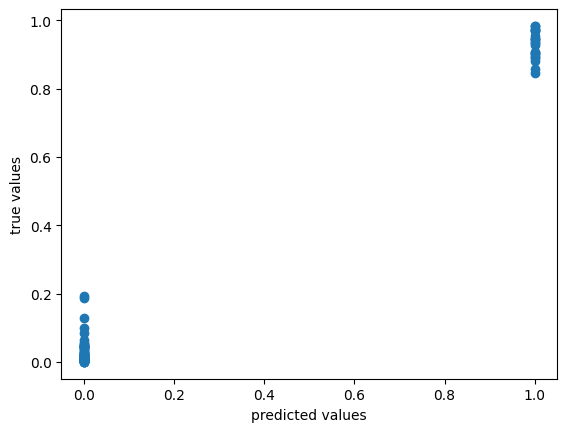

In [31]:
print("Random Forest") #  untuk mencetak label "Random Forest" dan mengevaluasi kinerja model Random Forest menggunakan fungsi accuracy yang sudah didefinisikan sebelumnya
accuracy(y_pred_randf,y_test)